<h1>SOCIO-ECONOMICAL ANALYSIS OF MADRID'S NEIGHBORHOODS</h1>

## Table of contents
* [INTRODUCTION](#INTRODUCTION)
* [DATA](#DATA)
* [METHODOLOGY](#METHODOLOGY)
* [ANALYSIS](#ANALYSIS)
* [RESULTS AND DISCUSSION](#RESULTS)
* [CONCLUSION](#CONCLUSION)

<h2>INTRODUCTION</h2>

As the financial capital in Southern Europe, Madrid is a safe and stable environment for companies to grow, and the chosen headquarter location of 2000 companies. Driving the young talent, Madrid offers extensive opportunities for further education, with 17 universities and over 30 research centers. With over 75 million tourists visiting Spain every year, the country occupies a significant worldwide economic position. It is the fourth metropolis in the EU by Gross Domestic Product thanks to leading employers such as Telefónica, Iberia, and BBVA. Sharing frontiers with 8 countries by land and sea, Spain is a logical destination for international trade, facilitated by the country's high-speed rail system, the second-longest network in the world. 

The city is divided into 21 districts and 131 neighborhoods. At first, we planned to use the Foursquare API, but we realized that there isn’t enough data for some neighborhoods. Fortunately, Madrid's City Council has an excellent [Open Data Website](https://datos.madrid.es/sites/v/index.jsp?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&buscar=true&Texto=&Sector=&Formato=1654e80303e82410VgnVCM100000171f5a0aTAXC&Periodicidad=&orderByCombo=CONTENT_INSTANCE_NAME_DECODE), that provides all kinds of socioeconomic data for the city.  Madrid also has an [Statistics Portal](https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Areas-de-informacion-estadistica/Areas-de-informacion-estadistica/?vgnextfmt=default&vgnextoid=9023c9fa0b23a210VgnVCM2000000c205a0aRCRD&vgnextchannel=b65ef78526674210VgnVCM1000000b205a0aRCRD) with so many useful data that is hard to choose just a few indicators. We will use datasets provided for both websites to perform a socio-economic analysis of Madrid and classify their neighborhoods based in their most common venues, the size and age of their population and their average income.

We consider that this is information can be useful for companies that want to invest in the city. They will be able to determine the best part of the city to locate their businesses depending on the kind of activity they perform (commercial, financial, industrial,...) and how their customer base is.

<h2>DATA</h2>

As I said earlier, the City Council Open Data website has lots of information, for this project we are going to use:
- Registry of venues and the activity that is performed in them. This is a huge dataset with more than 163000 rows and 46 columns. The most important columns are: venue id, district, neighborhood, venue situation ('open', 'closed',…) and description of the activity ('hairdresser service', 'bar', 'restaurant',...). It needs a lot of data cleaning and preprocessing to extract the relevant information, all the open venues in each neighborhood, and their activities. This information will be used to cluster the neighborhoods. [Link](https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=3ed1854c8410b410VgnVCM2000000c205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)
- Demographic indicators by neighborhood in 2016. It shows the total population, the average age, the percentage of the population that it's 65 years old and older... We consider that population and average age are relevant data that can help us to classify the neighborhoods. [Link](https://www.madrid.es/UnidadesDescentralizadas/UDCEstadistica/Nuevaweb/Econom%C3%ADa/Renta/Urban%20Audit/urban%20audit/Renta%20media%20de%20los%20hogares%20(Atlas%20de%20distribuci%C3%B3n)/31105dbs.xlsx)
- The average income per person and neighborhood. We will use it as well to classify the neighborhoods. For example, a company that sells luxury products needs a customer base with a high average income. [Link](https://www.madrid.es/UnidadesDescentralizadas/UDCEstadistica/Nuevaweb/Econom%C3%ADa/Renta/Urban%20Audit/urban%20audit/Renta%20media%20de%20los%20hogares%20(Atlas%20de%20distribuci%C3%B3n)/31097dbs.xlsx)
- Table with the coordinates of each neighborhood. This information was obtained using geopy and Nominatim and will be used to create a map of the neighborhoods and its clusters.
- Geojson file of Madrid that will be used in choropleth maps. [Link](https://github.com/codeforamerica/click_that_hood/blob/master/public/data/madrid.geojson)

After cleaning and preprocessing all the datasets, we will combine them in a pandas data frame to perform cluster analysis of the neighborhoods. We will represent the clusters in a map, alone and combined with choropleth maps.


<h3>Data Cleaning and Preprocessing</h3>

We start importing pandas to read the files.

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

First we read the file that contains all the information of the Madrid's venues.

In [2]:
df = pd.read_csv('OPEN DATA Locales-Epigrafes202002.csv', sep=';', encoding='latin-1', low_memory=False)
df.head()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,...,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,id_seccion,desc_seccion,id_division,desc_division,id_epigrafe,desc_epigrafe
0,10000003,1,CENTRO,104,JUSTICIA,NaN,NaN,88,"440554,59","4475338,53",...,NaN,PB,NaN,VITACA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561006,CAFETERIA
1,10000044,1,CENTRO,101,PALACIO,NaN,NaN,14,"439722,59","4473550,53",...,NaN,PB,NaN,V.M. VINOMANIA,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472502,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,10000071,1,CENTRO,106,SOL,NaN,NaN,119,"440388,59","4474077,53",...,NaN,PB,NaN,LA DESCUBIERTA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE
3,10000097,1,CENTRO,104,JUSTICIA,NaN,NaN,77,"440851,59","4474857,52",...,NaN,PB,NaN,BARRIGA LLENA,I,HOSTELERIA,56,SERVICIOS DE COMIDAS Y BEBIDAS,561001,RESTAURANTE
4,10000224,1,CENTRO,102,EMBAJADORES,NaN,NaN,35,0,0,...,Mercado Municipal,PB,70,SIN ROTULO,G,COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACI...,47,"COMERCIO AL POR MENOR, EXCEPTO DE VEHICULOS DE...",472201,COMERCIO AL POR MENOR DE CARNICERIA


We can see that most of the columns contain null values. This is the shape of the dataframe before we start the cleaning process.

In [3]:
df.shape

(163716, 46)

We check the columns of the dataframe.

In [4]:
df.columns

Index(['id_local', 'id_distrito_local', 'desc_distrito_local',
       'id_barrio_local', 'desc_barrio_local', 'cod_barrio_local',
       'id_seccion_censal_local', 'desc_seccion_censal_local',
       'coordenada_x_local', 'coordenada_y_local', 'id_tipo_acceso_local',
       'desc_tipo_acceso_local', 'id_situacion_local', 'desc_situacion_local',
       'id_vial_edificio', 'clase_vial_edificio', 'desc_vial_edificio',
       'id_ndp_edificio', 'id_clase_ndp_edificio', 'nom_edificio',
       'num_edificio', 'cal_edificio', 'secuencial_local_PC', 'id_vial_acceso',
       'clase_vial_acceso', 'desc_vial_acceso', 'id_ndp_acceso',
       'id_clase_ndp_acceso', 'nom_acceso', 'num_acceso', 'cal_acceso',
       'coordenada_x_agrupacion', 'coordenada_y_agrup', 'id_agrupacion',
       'nombre_agrupacion', 'id_tipo_agrup', 'desc_tipo_agrup',
       'id_planta_agrupado', 'id_local_agrupado', 'rotulo', 'id_seccion',
       'desc_seccion', 'id_division', 'desc_division', 'id_epigrafe',
       'desc_epi

The most important columns are:
- 'id_local', that contains a unique number for each venue.
- 'desc_barrio_local', that contains the name of the neighborhood where the venue is located.
- 'desc_situacion_local', that indicates if the venue is open, closed, used as a home,...
- 'desc_epigrafe', that contains the description of the activities developed in each venue based on the Economic Activities Index.

So we filter the dataframe with these columns.

In [5]:
columnas = ['id_local', 'desc_situacion_local', 'desc_barrio_local', 'desc_epigrafe']

In [6]:
df = df[columnas]
df.head()

,id_local,desc_situacion_local,desc_barrio_local,desc_epigrafe
0,10000003,Abierto,JUSTICIA,CAFETERIA
1,10000044,Abierto,PALACIO,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,10000071,Abierto,SOL,RESTAURANTE
3,10000097,Abierto,JUSTICIA,RESTAURANTE
4,10000224,Abierto,EMBAJADORES,COMERCIO AL POR MENOR DE CARNICERIA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163716 entries, 0 to 163715
Data columns (total 4 columns):
id_local                163716 non-null int64
desc_situacion_local    163716 non-null object
desc_barrio_local       163716 non-null object
desc_epigrafe           122611 non-null object
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [8]:
df.sort_values('id_local', ascending=True).head(10)

,id_local,desc_situacion_local,desc_barrio_local,desc_epigrafe
0,10000003,Abierto,JUSTICIA,CAFETERIA
45,10000003,Abierto,JUSTICIA,BAR RESTAURANTE
46,10000004,Abierto,UNIVERSIDAD,CAFETERIA
47,10000013,Abierto,EMBAJADORES,HOTELES Y MOTELES CON RESTAURANTE
1,10000044,Abierto,PALACIO,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
48,10000052,Abierto,JUSTICIA,BAR CON COCINA
64,10000071,Abierto,SOL,CAFETERIA
2,10000071,Abierto,SOL,RESTAURANTE
65,10000093,Abierto,JUSTICIA,CAFETERIA
3,10000097,Abierto,JUSTICIA,RESTAURANTE


We have duplicate values in the 'id_column' because one venue can perform two or more activities at once. In the case of schools, most of them have canteens, and the activity **SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL** (catering services in schools and childcare centers) appears as primary activity in most of them. We will have to drop it because we don't want it to appear as one of the most common activities. We see as well that the column 'desc_epigrafe' has null values. We need to drop duplicates and null values.

In [9]:
df = df[df['desc_epigrafe'] != 'SERVICIOS DE COMEDOR EN CENTROS EDUCATIVOS Y CENTROS DE CUIDADO INFANTIL']

In [10]:
df = df.drop_duplicates('id_local')
df = df.dropna()
df.shape

(106109, 4)

The number of rows has been reduced by almost 60000. The next step is keep only those venues that are open ('Abierto'), although it would be interesting to make the same analysis with the closed ('Cerrado') venues.

In [11]:
df['desc_situacion_local'].value_counts()

Abierto               100319
Cerrado                 3846
Baja Reunificacion      1422
Baja                     367
En obras                  87
Uso vivienda              59
Baja PC Asociado           9
Name: desc_situacion_local, dtype: int64

In [12]:
locales_act = df[df['desc_situacion_local'] == 'Abierto']

The next step is check the descriptions of the activities.

In [13]:
locales_act['desc_epigrafe'].sort_values().unique()[:11]

array(['ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES,  PINTURA, ACRISTALAMIENTO)',
       'ACTIVIDADES ADMINISTRATIVAS Y AUXILIARES DE OFICINA Y SERVICIOS DE REPROGRAFIA',
       'ACTIVIDADES ANEXAS AL TRANSPORTE',
       'ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES',
       'ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)',
       'ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)',
       'ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS',
       'ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA',
       'ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS',
       'ACTIVIDADES DE CONSULTORIA DE GESTION EMPRESARIAL',
       'ACTIVIDADES DE CONTABILIDAD, TENEDURIA, AUDITORIA Y ASESORIA FISCAL'],
      dtype=object)

We are going to translate the most common descriptions, drop the descriptions 'LOCAL SIN ACTIVIDAD' (venue with no activity) and 'SIN ASIGNAR' (activity not assigned) and translate the most common descriptions.

In [14]:
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE PRENDAS DE VESTIR EN ESTABLECIMIENTOS ESPECIALIZADOS',  'CLOTHING STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('OTRO COMERCIO AL POR MENOR DE PRODUCTOS ALIMENTICIOS \(PERECEDEROS Y NO PERECEDEROS\) CON VENDEDOR N.C.O.P.',  'FOOD STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('INTERMEDIACION MONETARIA: BANCOS, CAJAS DE AHORRO', 'BANKS', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('ACTIVIDADES ADMINISTRATIVAS Y AUXILIARES DE OFICINA Y SERVICIOS DE REPROGRAFIA', 'OFFICES', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR EN ESTABLECIMIENTOS NO ESPECIALIZADOS, CON PREDOMINIO EN PRODUCTOS ALIMENTICIOS, BEBIDAS Y TABACO \(AUTOSERVICIO\)', 'SUPERMARKETS', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE FRUTAS Y HORTALIZAS SIN OBRADOR', 'FRUIT STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace("ENSEÑANZA NO REGLADA \(DEPORTIVA Y RECREATIVA, CULTURAL, CLASES DE RECUPERACION, INFORMATICA\)", 'ACADEMY', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('TALLER DE REPARACION DE AUTOMOVILES ESPECIALIZADO EN MECANICA Y ELECTRICIDAD', 'CAR WORKSHOP', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('INSTALACIONES ELECTRICAS, DE FONTANERIA Y OTRAS EN OBRAS DE CONSTRUCCION', 'PLUMBING AND ELECTRICAL INSTALLATIONS', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE PRODUCTOS DE PRECIO UNICO, BAZARES Y ASIMILABLES', 'EURO STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE CALZADO Y ARTICULOS DE CUERO EN ESTABLECIMIENTOS ESPECIALIZADOS', 'SHOE STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE JOYAS, RELOJERIA Y BISUTERIA', 'JEWEL STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('LOCUTORIOS', 'PHONE BOOTH', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('DEPOSITO Y ALMACENAMIENTO', 'STOREHOUSE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('FARMACIA', 'PHARMACY', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('SERVICIO DE PELUQUERIA', 'HAIRDRESSER', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('CENTRO DE ESTETICA', 'COSMETIC CENTER', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('COMERCIO AL POR MENOR DE MUEBLES', 'FURNITURE STORE', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('CLINICAS MEDICAS', 'MEDICAL CENTER', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('ADMINISTRACION PUBLICA Y DEFENSA. SEGURIDAD SOCIAL OBLIGATORIA', 'ADMINISTRATION', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('BAR SIN COCINA', 'BAR', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('BAR CON COCINA', 'BAR', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('BAR ESPECIAL SIN ACTUACIONES', 'BAR', regex=True)
locales_act['desc_epigrafe'] = locales_act['desc_epigrafe'].replace('BAR RESTAURANTE', 'RESTAURANTE', regex=True)

In [15]:
locales_act= locales_act[locales_act['desc_epigrafe']!= 'LOCAL SIN ACTIVIDAD']
locales_act= locales_act[locales_act['desc_epigrafe']!= 'SIN ASIGNAR']

We don't need the column 'desc_situacion_local' anymore, so we drop it and change the order of the columns so the names of the neighborhoods appear first.

In [16]:
abiertos = locales_act[['desc_barrio_local', 'id_local', 'desc_epigrafe']]
abiertos.head()

,desc_barrio_local,id_local,desc_epigrafe
0,JUSTICIA,10000003,CAFETERIA
1,PALACIO,10000044,COMERCIO AL POR MENOR DE VINOS Y ALCOHOLES (BO...
2,SOL,10000071,RESTAURANTE
3,JUSTICIA,10000097,RESTAURANTE
4,EMBAJADORES,10000224,COMERCIO AL POR MENOR DE CARNICERIA


We check that we don't have null values.

In [17]:
abiertos.isna().any()

desc_barrio_local    False
id_local             False
desc_epigrafe        False
dtype: bool

we have our dataset almost ready to combine it with the others datasets and perform the analysis, but first we need to extract a list of the neighborhoods called 'nombres' (names) and change 'desc_barrio_local' to 'barrios' (neighborhoods).

In [18]:
nombres = pd.Series(abiertos['desc_barrio_local'].sort_values().unique())
nombres = nombres.to_list()

In [19]:
abiertos = abiertos.sort_values('desc_barrio_local', ascending=True)
abiertos.rename(columns={'desc_barrio_local':'barrios'}, inplace=True)
abiertos = abiertos.reset_index(drop=True)
abiertos.head()

,barrios,id_local,desc_epigrafe
0,ABRANTES,270153688,CARPINTERIA Y EBANISTERIA
1,ABRANTES,280055591,ACTIVIDADES DE ORGANIZACIONES RELIGIOSAS
2,ABRANTES,270154104,COMERCIO AL POR MENOR DE MATERIAL DE OPTICA
3,ABRANTES,270154071,COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...
4,ABRANTES,270154029,FURNITURE STORE


Now we open the file with the population data.

In [20]:
file = '31105dbs.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Distritos - Barrios', 'Secciones']


In [21]:
df = xl.parse('Distritos - Barrios')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,barrios,Edad media de la población,Porcentaje de población menor de 18 años,Porcentaje de población de 65 y más años,Tamaño medio del hogar,Porcentaje de hogares unipersonales,Población
0,011. Palacio,45.105190,10.001047,37.284051,1.954046,47.116254,21483.0
1,012. Embajadores,42.588063,10.236172,29.897280,2.016749,47.211251,43312.0
2,013. Cortes,44.603419,8.746671,32.939221,1.907738,49.132435,10092.0
3,014. Justicia,43.724197,10.356446,32.177076,1.945774,49.133641,15886.0
4,015. Universidad,43.640620,9.423621,32.220221,1.932032,48.727863,29749.0


We only need the average age ('Edad media de la población') and the total population of each neighborhood.

In [22]:
population = df[['barrios', 'Edad media de la población', 'Población']]
population.head()

,barrios,Edad media de la población,Población
0,011. Palacio,45.105190,21483.0
1,012. Embajadores,42.588063,43312.0
2,013. Cortes,44.603419,10092.0
3,014. Justicia,43.724197,15886.0
4,015. Universidad,43.640620,29749.0


If we want to combine both data frames, the names of the neighborhoods in the **population** data frame must match exactly the names of the neighborhoods in the **abiertos** data frame. Therefore, we have to analyze which names are contained in the **abiertos** data frame and modify the names in the **population** data frame accordingly. To do this, firts we create a list called **br** with the name of the neighborhoods in the **population** data frame, and then we modify the **nombres** list so it matches exactly the **br** list. We called **barrios_norm** to this new list. 

In [23]:
br = population['barrios'].to_list()

In [24]:
barrios_norm = ['PALACIO             ', 'EMBAJADORES         ', 'CORTES              ', 'JUSTICIA            ', 'UNIVERSIDAD         ', 'SOL                 ', 'IMPERIAL            ', 'ACACIAS             ', 'CHOPERA             ', 'LEGAZPI             ', 'DELICIAS            ', 'PALOS DE MOGUER     ', 'ATOCHA              ' , 'PACIFICO            ', 'ADELFAS             ', 'ESTRELLA            ', 'IBIZA               ', 'LOS JERONIMOS       ', 'NIÑO JESUS          ', 'RECOLETOS           ', 'GOYA                ', 'FUENTE DEL BERRO    ', 'GUINDALERA          ', 'LISTA               ', 'CASTELLANA          ', 'EL VISO             ', 'PROSPERIDAD         ', 'CIUDAD JARDIN       ', 'HISPANOAMERICA      ', 'NUEVA ESPAÑA        ', 'CASTILLA            ', 'BELLAS VISTAS       ', 'CUATRO CAMINOS      ', 'CASTILLEJOS         ', 'ALMENARA            ', 'VALDEACEDERAS       ', 'BERRUGUETE          ', 'GAZTAMBIDE          ', 'ARAPILES            ', 'TRAFALGAR           ', 'ALMAGRO             ', 'RIOS ROSAS          ', 'VALLEHERMOSO        ', 'EL PARDO            ', 'FUENTELARREINA      ', 'PEÑA GRANDE         ', 'EL PILAR            ', 'LA PAZ              ', 'VALVERDE            ',  'MIRASIERRA          ', 'EL GOLOSO           ', 'CASA DE CAMPO       ', 'ARGUELLES           ', 'CIUDAD UNIVERSITARIA', 'VALDEZARZA          ', 'VALDEMARIN          ', 'EL PLANTIO          ', 'ARAVACA             ', 'LOS CARMENES        ', 'PUERTA DEL ANGEL    ', 'LUCERO              ', 'ALUCHE              ', 'CAMPAMENTO          ', 'CUATRO VIENTOS      ', 'LAS AGUILAS         ', 'COMILLAS            ', 'OPAÑEL              ', 'SAN ISIDRO          ', 'VISTA ALEGRE        ', 'PUERTA BONITA       ', 'BUENAVISTA          ', 'ABRANTES            ', 'ORCASITAS           ', 'ORCASUR             ', 'SAN FERMIN          ', 'ALMENDRALES         ', 'MOSCARDO            ', 'ZOFIO               ', 'PRADOLONGO          ', 'ENTREVIAS           ', 'SAN DIEGO           ', 'PALOMERAS BAJAS     ', 'PALOMERAS SURESTE   ', 'PORTAZGO            ', 'NUMANCIA            ', 'PAVONES             ', 'HORCAJO             ', 'MARROQUINA          ', 'MEDIA LEGUA         ',  'FONTARRON           ', 'VINATEROS           ', 'VENTAS              ',  'PUEBLO NUEVO        ', 'QUINTANA            ',  'CONCEPCION          ', 'SAN PASCUAL         ', 'SAN JUAN BAUTISTA   ', 'COLINA              ', 'ATALAYA             ', 'COSTILLARES         ', 'PALOMAS             ', 'PIOVERA             ',  'CANILLAS            ', 'PINAR DEL REY       ', 'APOSTOL SANTIAGO    ',  'VALDEFUENTES        ', 'SAN ANDRES          ', 'SAN CRISTOBAL       ', 'BUTARQUE            ', 'LOS ROSALES         ',  'LOS ANGELES         ', 'CASCO H.VALLECAS    ', 'SANTA EUGENIA       ', 'ENSANCHE DE VALLECAS', 'CASCO H.VICALVARO   ', 'VALDEBERNARDO', 'VALDERRIVAS', 'EL CAÑAVERAL', 'SIMANCAS            ', 'HELLIN              ', 'AMPOSTA             ', 'ARCOS               ',  'ROSAS               ', 'REJAS               ', 'CANILLEJAS          ', 'EL SALVADOR         ', 'ALAMEDA DE OSUNA    ', 'AEROPUERTO          ', 'CASCO H.BARAJAS     ', 'TIMON               ', 'CORRALEJOS          ']

Now we use a dictionary to combine both lists and replace the values of **barrios** in the **population** data frame.

In [25]:
population['barrios'].replace(dict(zip(br, barrios_norm)), inplace=True)
population.head()

,barrios,Edad media de la población,Población
0,PALACIO,45.105190,21483.0
1,EMBAJADORES,42.588063,43312.0
2,CORTES,44.603419,10092.0
3,JUSTICIA,43.724197,15886.0
4,UNIVERSIDAD,43.640620,29749.0


Because the file is from 2016, we don't have information for some neighborhoods, so we decide to fill the null values using the mean.

In [26]:
population = population.fillna(population.mean())

Next, we sort the values of the **population** data frame and reset the index.

In [27]:
population = population.sort_values('barrios').reset_index(drop=True)
population.head()

,barrios,Edad media de la población,Población
0,ABRANTES,42.208792,29038.0
1,ACACIAS,45.154373,36329.0
2,ADELFAS,43.864417,17927.0
3,AEROPUERTO,40.900000,1741.0
4,ALAMEDA DE OSUNA,43.340090,19334.0


Now we normalize the data.

In [28]:
population["nor_age"] = population['Edad media de la población'] / population['Edad media de la población'].max()
population["nor_pop"] = population['Población'] / population['Población'].max()
pop_norm = population[['barrios','nor_age', 'nor_pop']]
pop_norm.head()

,barrios,nor_age,nor_pop
0,ABRANTES,0.863129,0.366776
1,ACACIAS,0.923363,0.458868
2,ADELFAS,0.896985,0.226434
3,AEROPUERTO,0.836366,0.021990
4,ALAMEDA DE OSUNA,0.886263,0.244206


We apply the same process to the average income data.

In [29]:
file = '31097dbs.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)

['Distrito-Barrio', 'Estimación nuevos barrios 2017', 'Secciones']


In [30]:
df1 = xl.parse('Distrito-Barrio')
df1.rename(columns= {'Unnamed: 0': 'barrios', 'Renta media por persona ':'r_media'}, inplace=True)
renta_media = df1[['barrios', 'r_media']]
b = renta_media['barrios'].to_list()
renta_media.head()

,barrios,r_media
0,011. Palacio,17845.598240
1,012. Embajadores,12920.895064
2,013. Cortes,19270.459176
3,014. Justicia,20595.412250
4,015. Universidad,16157.878013


In [31]:
renta_media['barrios'].replace(dict(zip(b, barrios_norm)), inplace=True)
renta_media = renta_media.sort_values('barrios').reset_index(drop=True)
renta_media.head()

,barrios,r_media
0,ABRANTES,10450.990392
1,ACACIAS,19020.895648
2,ADELFAS,18994.695264
3,AEROPUERTO,9669.000000
4,ALAMEDA DE OSUNA,19399.284617


In [32]:
renta_media['norm_income']=(renta_media['r_media']-renta_media['r_media'].min())/(renta_media['r_media'].max()-renta_media['r_media'].min())
renta_media.head()

,barrios,r_media,norm_income
0,ABRANTES,10450.990392,0.189882
1,ACACIAS,19020.895648,0.556965
2,ADELFAS,18994.695264,0.555842
3,AEROPUERTO,9669.000000,0.156387
4,ALAMEDA DE OSUNA,19399.284617,0.573172


The next dataset that we need to process is the table with the geographic coordinates of each neighborhood.

In [33]:
df = pd.read_csv('barrios.csv')
df = df.drop('Unnamed: 0', 1)
ba = df['barrios'].to_list()
df.head()

,barrios,latitud,longitud
0,Abrantes,40.380998,-3.727985
1,Acacias,40.404075,-3.705957
2,Adelfas,40.400280,-3.671774
3,Aeropuerto,40.494167,-3.566944
4,Aguilas,40.381459,-3.780377


In [34]:
Nombres_barrios = ['ABRANTES            ', 'ACACIAS             ', 'ADELFAS             ', 'AEROPUERTO          ', 'LAS AGUILAS         ',  'ALAMEDA DE OSUNA    ', 'ALMAGRO             ', 'ALMENARA            ', 'ALMENDRALES         ', 'ALUCHE              ', 'AMPOSTA             ',  'LOS ANGELES         ',  'APOSTOL SANTIAGO    ', 'ARAPILES            ', 'ARAVACA             ', 'ARCOS               ', 'ARGUELLES           ', 'ATALAYA             ', 'ATOCHA              ', 'BELLAS VISTAS       ', 'BERRUGUETE          ', 'BUENAVISTA          ', 'BUTARQUE            ', 'CAMPAMENTO          ', 'CANILLAS            ', 'CANILLEJAS          ', 'CASA DE CAMPO       ', 'CASCO H.BARAJAS     ', 'CASCO H.VALLECAS    ', 'CASCO H.VICALVARO   ', 'CASTELLANA          ', 'CASTILLA            ', 'CASTILLEJOS         ', 'CHOPERA             ', 'CIUDAD JARDIN       ', 'CIUDAD UNIVERSITARIA', 'COLINA              ', 'COMILLAS            ', 'CONCEPCION          ', 'CORRALEJOS          ', 'CORTES              ', 'COSTILLARES         ', 'CUATRO CAMINOS      ', 'CUATRO VIENTOS      ', 'DELICIAS            ', 'EL CAÑAVERAL', 'EL GOLOSO           ', 'EL PARDO            ', 'EL PLANTIO          ', 'EL SALVADOR         ', 'EL VISO             ', 'EMBAJADORES         ', 'ENSANCHE DE VALLECAS', 'ENTREVIAS           ', 'ESTRELLA            ', 'FONTARRON           ', 'FUENTE DEL BERRO    ', 'FUENTELARREINA      ', 'GAZTAMBIDE          ', 'GOYA                ', 'GUINDALERA          ', 'HELLIN              ', 'HISPANOAMERICA      ', 'HORCAJO             ', 'IBIZA               ', 'IMPERIAL            ', 'JUSTICIA            ', 'LA PAZ              ',  'LEGAZPI             ', 'LISTA               ', 'LOS CARMENES        ', 'LOS JERONIMOS       ', 'LOS ROSALES         ',  'LUCERO              ', 'MARROQUINA          ', 'MEDIA LEGUA         ', 'MIRASIERRA          ', 'MOSCARDO            ', 'NIÑO JESUS          ', 'NUEVA ESPAÑA        ', 'NUMANCIA            ', 'OPAÑEL              ', 'ORCASITAS           ', 'ORCASUR             ', 'PACIFICO            ', 'PALACIO             ', 'PALOMAS             ', 'PALOMERAS BAJAS     ', 'PALOMERAS SURESTE   ', 'PALOS DE MOGUER     ', 'PAVONES             ', 'PEÑA GRANDE         ',  'EL PILAR            ','PINAR DEL REY       ', 'PIOVERA             ',  'PORTAZGO            ', 'PRADOLONGO          ', 'PROSPERIDAD         ', 'PUEBLO NUEVO        ', 'PUERTA BONITA       ', 'PUERTA DEL ANGEL    ', 'QUINTANA            ', 'RECOLETOS           ', 'REJAS               ', 'ROSAS               ', 'RIOS ROSAS          ', 'SAN CRISTOBAL       ', 'SAN DIEGO           ', 'SAN FERMIN          ', 'SAN ISIDRO          ', 'SAN JUAN BAUTISTA   ', 'SAN PASCUAL         ', 'SANTA EUGENIA       ', 'SIMANCAS            ', 'SOL                 ', 'TIMON               ', 'TRAFALGAR           ', 'UNIVERSIDAD         ', 'VALDEACEDERAS       ', 'VALDEBERNARDO', 'VALDEFUENTES        ',
 'VALDEMARIN          ', 'VALDERRIVAS', 'VALDEZARZA          ', 'VALLEHERMOSO        ', 'VALVERDE            ', 'VENTAS              ',  'SAN ANDRES          ', 'VINATEROS           ', 'VISTA ALEGRE        ', 'ZOFIO               ']


In [35]:
df['barrios'].replace(dict(zip(ba, Nombres_barrios)), inplace=True)
df = df.sort_values('barrios').reset_index(drop=True)
df.head()

,barrios,latitud,longitud
0,ABRANTES,40.380998,-3.727985
1,ACACIAS,40.404075,-3.705957
2,ADELFAS,40.400280,-3.671774
3,AEROPUERTO,40.494167,-3.566944
4,ALAMEDA DE OSUNA,40.457222,-3.587778


We are going to combine the geograpical data with the population and income data.

In [91]:
merged = df.join(population.set_index('barrios'), on='barrios')
merged.head()

,barrios,latitud,longitud,Edad media de la población,Población,nor_age,nor_pop
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,0.863129,0.366776
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,0.923363,0.458868
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,0.896985,0.226434
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,0.836366,0.021990
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,0.886263,0.244206


In [92]:
merged_bis = merged.join(renta_media.set_index('barrios'), on='barrios')
merged_bis.head()

,barrios,latitud,longitud,Edad media de la población,Población,nor_age,nor_pop,r_media,norm_income
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,0.863129,0.366776,10450.990392,0.189882
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,0.923363,0.458868,19020.895648,0.556965
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,0.896985,0.226434,18994.695264,0.555842
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,0.836366,0.021990,9669.000000,0.156387
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,0.886263,0.244206,19399.284617,0.573172


In [93]:
barrios = merged_bis[['barrios', 'latitud', 'longitud', 'Edad media de la población', 'Población', 'r_media']]
barrios.head()

,barrios,latitud,longitud,Edad media de la población,Población,r_media
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,19020.895648
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,18994.695264
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,9669.000000
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,19399.284617


Now we represent the Madrid's neighborhoods in a map.

In [94]:
from geopy.geocoders import Nominatim
address = 'Madrid, Madrid'

geolocator = Nominatim(user_agent="madrid_explorer", timeout=100)
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Madrid are 40.4167047, -3.7035825.


In [95]:
import folium 
import matplotlib.cm as cm
import matplotlib.colors as colors

map_madrid = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, neighborhood in zip(barrios['latitud'], barrios['longitud'], barrios['barrios']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_madrid)  
    
map_madrid.save('map.html')

<h1>METHODOLOGY</h1>

Now that we have all the data ready, we can start the analysis. We will:
- Analyze the age, population and income data to see how are distributed, and add level labels to the data: low, medium-low, medium, medium-high and high.
- Combine all this data with the venues data and apply KMeans algorithm to cluster the neighborhoods. 
- Compare the income, age and population data of all the clusters.
- Compare the most common venues of each cluster.
- Represent all this information in maps.

<h1>ANALYSIS</h1>

<h2>Income data</h2>
Let's plot an histogram of the income data grouped in 5 bins.

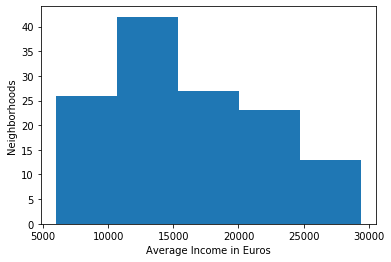

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.hist(barrios["r_media"], bins=5)
ax.set_xlabel("Average Income in Euros")
ax.set_ylabel("Neighborhoods")
plt.show()

Based on this, the average income levels are:
- Low Income: 10000 euros
- Mid-low Income: 15000-10000 euros
- Mid Income: 20000-15000 euros
- Mid-high Income: 25000-20000 euros
- High Income: 30000-25000 euros

We can create the labels with this levels.

In [97]:
level = []
for i in range(0,len(barrios)):
    if (barrios['r_media'][i] <= 10000):
        level.append("Low Income")
    elif (barrios['r_media'][i] > 10000 and barrios['r_media'][i] <= 15000):
        level.append("Mid-low Income")
    elif (barrios['r_media'][i] > 15000 and barrios['r_media'][i] <= 20000):
        level.append("Mid Income")
    elif (barrios['r_media'][i] > 20000 and barrios['r_media'][i] <= 25000):
        level.append("Mid-high Income")
    else:
        level.append("High Income")   

barrios['Income_labels'] = level
barrios.head()

,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,19020.895648,Mid Income
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,18994.695264,Mid Income
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,9669.000000,Low Income
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,19399.284617,Mid Income


<h2>Population data</h2>
Let's plot the population data

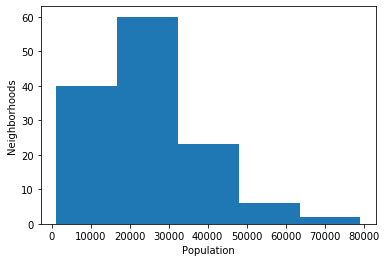

In [98]:
fig, ax = plt.subplots()
ax.hist(barrios["Población"], bins=5)
ax.set_xlabel("Population")
ax.set_ylabel("Neighborhoods")
plt.show()

Based on this, the population levels are:
- Low pop: 15000 people
- Mid-low pop: 30000-15000 people
- Mid pop: 45000-30000 people
- Mid-high pop: 65000-45000 people
- High pop: 80000-65000 people

Let's create the labels.

In [99]:
level = []
for i in range(0,len(barrios)):
    if (barrios['Población'][i] <= 15000):
        level.append("Low Pop")
    elif (barrios['Población'][i] > 15000 and barrios['Población'][i] <= 30000):
        level.append("Mid-low Pop")
    elif (barrios['Población'][i] > 30000 and barrios['Población'][i] <= 45000):
        level.append("Mid Pop")
    elif (barrios['Población'][i] > 45000 and barrios['Población'][i] <= 65000):
        level.append("Mid-high Pop")
    else:
        level.append("High Pop")   

barrios['Population_labels'] = level
barrios.head()

,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,19020.895648,Mid Income,Mid Pop
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,18994.695264,Mid Income,Mid-low Pop
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,9669.000000,Low Income,Low Pop
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,19399.284617,Mid Income,Mid-low Pop


<h2>Average age data</h2>
Let's see the histogram.

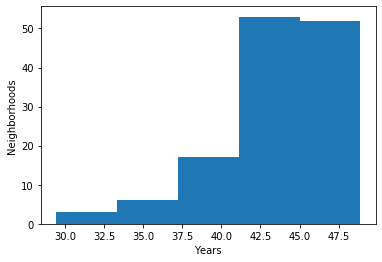

In [100]:
fig, ax = plt.subplots()
ax.hist(barrios["Edad media de la población"], bins=5)
ax.set_xlabel("Years")
ax.set_ylabel("Neighborhoods")
plt.show()

Based on this, we can clasify the neighborhoods in:
- Low age: 33 years
- Mid-low age: 33-37.5 years
- Mid age: 41-37.5 years
- Mid-high age: 45-41 years
- High age: 49-45 years

Let's add the labels.

In [101]:
level = []
for i in range(0,len(barrios)):
    if (barrios['Edad media de la población'][i] <= 33):
        level.append("Low Age")
    elif (barrios['Edad media de la población'][i] > 33 and barrios['Edad media de la población'][i] <= 37.5):
        level.append("Mid-low Age")
    elif (barrios['Edad media de la población'][i] > 37.5 and barrios['Edad media de la población'][i] <= 41):
        level.append("Mid Age")
    elif (barrios['Edad media de la población'][i] > 41 and barrios['Edad media de la población'][i] <= 45):
        level.append("Mid-high age")
    else:
        level.append("High Age")   

barrios['Age_labels'] = level
barrios.head()

,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels,Age_labels
0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age
1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,19020.895648,Mid Income,Mid Pop,High Age
2,ADELFAS,40.400280,-3.671774,43.864417,17927.0,18994.695264,Mid Income,Mid-low Pop,Mid-high age
3,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,9669.000000,Low Income,Low Pop,Mid Age
4,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,19399.284617,Mid Income,Mid-low Pop,Mid-high age


<h2>Cluster Analysis</h2>

Let's see how many venues we have for each neighborhood.

In [102]:
abiertos_grouped = abiertos.groupby('barrios').count()
abiertos_grouped.head()

,id_local,desc_epigrafe
barrios,,
ABRANTES,613,613
ACACIAS,965,965
ADELFAS,327,327
AEROPUERTO,347,347
ALAMEDA DE OSUNA,320,320


Now let's find out how many unique activities can be curated from all venues.

In [103]:
print('There are {} unique categories.'.format(len(abiertos['desc_epigrafe'].unique())))

There are 429 unique categories.


Now we use one hot encoding to transform all the unique activities into numbers.

In [104]:
abiertos_onehot = pd.get_dummies(abiertos[['desc_epigrafe']], prefix="", prefix_sep="")
abiertos_onehot.head()

,"ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES, PINTURA, ACRISTALAMIENTO)",ACADEMY,ACTIVIDADES ANEXAS AL TRANSPORTE,ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES,"ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)","ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)",ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,"ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA",ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS,ACTIVIDADES DE CONSULTORIA DE GESTION EMPRESARIAL,...,TIENDA DE CONVENIENCIA (24H),TRANSPORTE AEREO,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVICIOS DE MUDANZAS,TRANSPORTE INTERURBANO DE PASAJEROS POR FERROCARRIL,"TRANSPORTE TERRESTRE URBANO (AUTOBUS, METRO, TAXI) O INTERURBANO (EXCEPTO POR FERROCARRIL)",TRATAMIENTO HIGIENICO DE ANIMALES (PELUQUERIAS),VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PARA SU CONSUMO INMEDIATO,VENTA DE MOTOCICLETAS,VIDEOCLUB,VIVIENDAS TURISTICAS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Then we merge abiertos_onehot to the 'barrios' column of abiertos. 

In [105]:
abiertos_onehot = pd.concat([abiertos['barrios'], abiertos_onehot], axis=1)
abiertos_onehot.head()

,barrios,"ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES, PINTURA, ACRISTALAMIENTO)",ACADEMY,ACTIVIDADES ANEXAS AL TRANSPORTE,ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES,"ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)","ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)",ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,"ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA",ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS,...,TIENDA DE CONVENIENCIA (24H),TRANSPORTE AEREO,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVICIOS DE MUDANZAS,TRANSPORTE INTERURBANO DE PASAJEROS POR FERROCARRIL,"TRANSPORTE TERRESTRE URBANO (AUTOBUS, METRO, TAXI) O INTERURBANO (EXCEPTO POR FERROCARRIL)",TRATAMIENTO HIGIENICO DE ANIMALES (PELUQUERIAS),VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PARA SU CONSUMO INMEDIATO,VENTA DE MOTOCICLETAS,VIDEOCLUB,VIVIENDAS TURISTICAS
0,ABRANTES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ABRANTES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABRANTES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ABRANTES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ABRANTES,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each activity.

In [106]:
abiertos_onehot_grouped = abiertos_onehot.groupby('barrios').mean().reset_index()
abiertos_onehot_grouped.head()

,barrios,"ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES, PINTURA, ACRISTALAMIENTO)",ACADEMY,ACTIVIDADES ANEXAS AL TRANSPORTE,ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES,"ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)","ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)",ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,"ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA",ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS,...,TIENDA DE CONVENIENCIA (24H),TRANSPORTE AEREO,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVICIOS DE MUDANZAS,TRANSPORTE INTERURBANO DE PASAJEROS POR FERROCARRIL,"TRANSPORTE TERRESTRE URBANO (AUTOBUS, METRO, TAXI) O INTERURBANO (EXCEPTO POR FERROCARRIL)",TRATAMIENTO HIGIENICO DE ANIMALES (PELUQUERIAS),VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PARA SU CONSUMO INMEDIATO,VENTA DE MOTOCICLETAS,VIDEOCLUB,VIVIENDAS TURISTICAS
0,ABRANTES,0.001631,0.006525,0.001631,0.001631,0.000000,0.001631,0.0,0.001631,0.000000,...,0.001631,0.000000,0.000000,0.0,0.001631,0.001631,0.0,0.000000,0.000000,0.0
1,ACACIAS,0.004145,0.048705,0.001036,0.000000,0.005181,0.001036,0.0,0.002073,0.000000,...,0.000000,0.000000,0.002073,0.0,0.000000,0.003109,0.0,0.001036,0.000000,0.0
2,ADELFAS,0.000000,0.027523,0.000000,0.003058,0.000000,0.000000,0.0,0.003058,0.000000,...,0.000000,0.003058,0.006116,0.0,0.006116,0.000000,0.0,0.009174,0.000000,0.0
3,AEROPUERTO,0.000000,0.000000,0.051873,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.005764,0.028818,0.008646,0.0,0.005764,0.000000,0.0,0.000000,0.000000,0.0
4,ALAMEDA DE OSUNA,0.003125,0.025000,0.006250,0.000000,0.000000,0.003125,0.0,0.006250,0.003125,...,0.000000,0.003125,0.000000,0.0,0.003125,0.003125,0.0,0.000000,0.003125,0.0


Now we combine the venues data with the normalized income population and age data.

In [107]:
income = renta_media[['barrios', 'norm_income']]
income.head()

,barrios,norm_income
0,ABRANTES,0.189882
1,ACACIAS,0.556965
2,ADELFAS,0.555842
3,AEROPUERTO,0.156387
4,ALAMEDA DE OSUNA,0.573172


In [108]:
merged = abiertos_onehot_grouped.join(income.set_index('barrios'), on='barrios')
merged.head()

,barrios,"ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES, PINTURA, ACRISTALAMIENTO)",ACADEMY,ACTIVIDADES ANEXAS AL TRANSPORTE,ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES,"ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)","ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)",ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,"ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA",ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS,...,TRANSPORTE AEREO,TRANSPORTE DE MERCANCIAS POR CARRETERA Y SERVICIOS DE MUDANZAS,TRANSPORTE INTERURBANO DE PASAJEROS POR FERROCARRIL,"TRANSPORTE TERRESTRE URBANO (AUTOBUS, METRO, TAXI) O INTERURBANO (EXCEPTO POR FERROCARRIL)",TRATAMIENTO HIGIENICO DE ANIMALES (PELUQUERIAS),VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PARA SU CONSUMO INMEDIATO,VENTA DE MOTOCICLETAS,VIDEOCLUB,VIVIENDAS TURISTICAS,norm_income
0,ABRANTES,0.001631,0.006525,0.001631,0.001631,0.000000,0.001631,0.0,0.001631,0.000000,...,0.000000,0.000000,0.0,0.001631,0.001631,0.0,0.000000,0.000000,0.0,0.189882
1,ACACIAS,0.004145,0.048705,0.001036,0.000000,0.005181,0.001036,0.0,0.002073,0.000000,...,0.000000,0.002073,0.0,0.000000,0.003109,0.0,0.001036,0.000000,0.0,0.556965
2,ADELFAS,0.000000,0.027523,0.000000,0.003058,0.000000,0.000000,0.0,0.003058,0.000000,...,0.003058,0.006116,0.0,0.006116,0.000000,0.0,0.009174,0.000000,0.0,0.555842
3,AEROPUERTO,0.000000,0.000000,0.051873,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.028818,0.008646,0.0,0.005764,0.000000,0.0,0.000000,0.000000,0.0,0.156387
4,ALAMEDA DE OSUNA,0.003125,0.025000,0.006250,0.000000,0.000000,0.003125,0.0,0.006250,0.003125,...,0.003125,0.000000,0.0,0.003125,0.003125,0.0,0.000000,0.003125,0.0,0.573172


In [109]:
merged_bis= merged.join(pop_norm.set_index('barrios'), on='barrios')
merged_bis.head()

,barrios,"ACABADO DE EDIFICIOS (CARPINTERIA, REVOCAMIENTO, REVESTIMIENTO DE SUELOS Y PAREDES, PINTURA, ACRISTALAMIENTO)",ACADEMY,ACTIVIDADES ANEXAS AL TRANSPORTE,ACTIVIDADES AUXILIARES A SEGUROS Y FONDOS DE PENSIONES,"ACTIVIDADES CINEMATOGRAFICAS, DE VIDEO Y DE TELEVISION (PRODUCCION, DISTRIBUCION Y EXHIBICION)","ACTIVIDADES DE APOYO A LAS EMPRESAS N.C.O.P. (AGENCIAS DE COBROS, ENVASADO Y EMPAQUETADO)",ACTIVIDADES DE APOYO A LAS INDUSTRIAS EXTRACTIVAS,"ACTIVIDADES DE BIBLIOTECAS, ARCHIVOS, MUSEOS Y DE GALERIAS Y SALAS DE EXPOSICIONES SIN VENTA",ACTIVIDADES DE CLUBES DEPORTIVOS Y OTRAS ACTIVIDADES DEPORTIVAS,...,TRANSPORTE INTERURBANO DE PASAJEROS POR FERROCARRIL,"TRANSPORTE TERRESTRE URBANO (AUTOBUS, METRO, TAXI) O INTERURBANO (EXCEPTO POR FERROCARRIL)",TRATAMIENTO HIGIENICO DE ANIMALES (PELUQUERIAS),VENDEDOR AMBULANTE DE ALIMENTOS PREPARADOS PARA SU CONSUMO INMEDIATO,VENTA DE MOTOCICLETAS,VIDEOCLUB,VIVIENDAS TURISTICAS,norm_income,nor_age,nor_pop
0,ABRANTES,0.001631,0.006525,0.001631,0.001631,0.000000,0.001631,0.0,0.001631,0.000000,...,0.0,0.001631,0.001631,0.0,0.000000,0.000000,0.0,0.189882,0.863129,0.366776
1,ACACIAS,0.004145,0.048705,0.001036,0.000000,0.005181,0.001036,0.0,0.002073,0.000000,...,0.0,0.000000,0.003109,0.0,0.001036,0.000000,0.0,0.556965,0.923363,0.458868
2,ADELFAS,0.000000,0.027523,0.000000,0.003058,0.000000,0.000000,0.0,0.003058,0.000000,...,0.0,0.006116,0.000000,0.0,0.009174,0.000000,0.0,0.555842,0.896985,0.226434
3,AEROPUERTO,0.000000,0.000000,0.051873,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.005764,0.000000,0.0,0.000000,0.000000,0.0,0.156387,0.836366,0.021990
4,ALAMEDA DE OSUNA,0.003125,0.025000,0.006250,0.000000,0.000000,0.003125,0.0,0.006250,0.003125,...,0.0,0.003125,0.003125,0.0,0.000000,0.003125,0.0,0.573172,0.886263,0.244206


Now we can perform cluster analysys applying KMeans algorithm. We use the elbow method to determine the optimal number of clusters. 

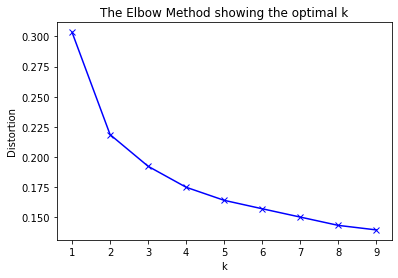

In [110]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

X = merged_bis.drop('barrios', 1)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [111]:
kclusters=5
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)
kmeans.labels_[0:10] 

array([0, 1, 1, 0, 1, 4, 3, 0, 2, 0])

We add the cluster labels to **barrios**.

In [112]:
barrios.insert(0, 'Cluster Labels', kmeans.labels_)
barrios.head()

,Cluster Labels,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels,Age_labels
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age
1,1,ACACIAS,40.404075,-3.705957,45.154373,36329.0,19020.895648,Mid Income,Mid Pop,High Age
2,1,ADELFAS,40.400280,-3.671774,43.864417,17927.0,18994.695264,Mid Income,Mid-low Pop,Mid-high age
3,0,AEROPUERTO,40.494167,-3.566944,40.900000,1741.0,9669.000000,Low Income,Low Pop,Mid Age
4,1,ALAMEDA DE OSUNA,40.457222,-3.587778,43.340090,19334.0,19399.284617,Mid Income,Mid-low Pop,Mid-high age


In [113]:
barrios.isna().any()

Cluster Labels                False
barrios                       False
latitud                       False
longitud                      False
Edad media de la población    False
Población                     False
r_media                       False
Income_labels                 False
Population_labels             False
Age_labels                    False
dtype: bool

Let's plot boxplots of the average age, average income and population of the neighborhoods of each cluster to see if we can find any patterns.

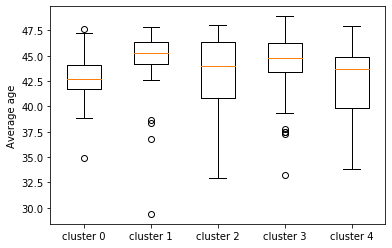

In [114]:
cluster_0 = barrios[barrios['Cluster Labels'] == 0]
cluster_1 = barrios[barrios['Cluster Labels'] == 1]
cluster_2 = barrios[barrios['Cluster Labels'] == 2]
cluster_3 = barrios[barrios['Cluster Labels'] == 3]
cluster_4 = barrios[barrios['Cluster Labels'] == 4]

fig, ax = plt.subplots()
ax.boxplot([cluster_0["Edad media de la población"], cluster_1["Edad media de la población"], cluster_2["Edad media de la población"], 
            cluster_3["Edad media de la población"], cluster_4["Edad media de la población"]])
ax.set_xticklabels(["cluster 0", "cluster 1", 'cluster 2', 'cluster 3', 'cluster 4'])
ax.set_ylabel("Average age")
plt.show()

In [131]:
cluster_4['Population_labels'].value_counts()

Low Pop        9
Mid-low Pop    5
Name: Population_labels, dtype: int64

We have seen already that Madrid is an 'old' city and most of the neighborhoods have an average age of 45 years or more. The few neighborhoods with 'low_age' label appear as outliers in clusters 1 and give a negative skewness to cluster 2. 'Mid-low age' neighborhoods appear as outliers in clusters 0 and 3 and give a negative eskewness to cluster 4.

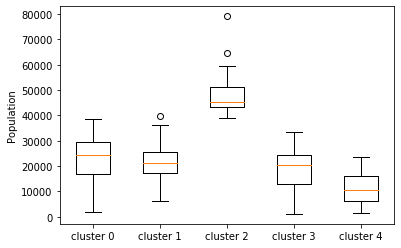

In [61]:
fig, ax = plt.subplots()
ax.boxplot([cluster_0["Población"], cluster_1["Población"], cluster_2["Población"], 
            cluster_3["Población"], cluster_4["Población"]])
ax.set_xticklabels(["cluster 0", "cluster 1", 'cluster 2', 'cluster 3', 'cluster 4'])
ax.set_ylabel("Population")
plt.show()

It's quite clear that cluster 2 groups the most populated neighborhoods and cluster 4 the least populated. 

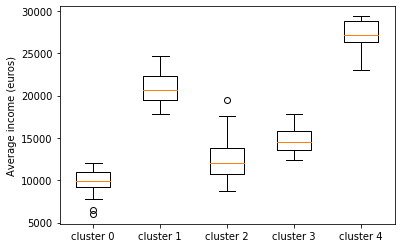

In [62]:
fig, ax = plt.subplots()
ax.boxplot([cluster_0["r_media"], cluster_1["r_media"], cluster_2["r_media"], cluster_3["r_media"], cluster_4["r_media"]])
ax.set_xticklabels(["cluster 0", "cluster 1", 'cluster 2', 'cluster 3', 'cluster 4'])
ax.set_ylabel("Average income (euros)")
plt.show()

The order of the clusters from richest to poorest is: cluster 4, cluster 1, cluster 3, cluster 2 and cluster 0.

Let's see the clusters in the map

In [63]:
map_clusters = folium.Map(location=[40.4167047, -3.7035825], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, i, p, a in zip(barrios['latitud'], barrios['longitud'], barrios['barrios'], barrios['Cluster Labels'], 
                                 barrios['Income_labels'], barrios['Population_labels'], barrios['Age_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' / ' + str(i) + ' / ' + str(p) + ' / ' + str(a), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters.save('map_clusters.html')

Let's check which are the 15 most common venues for each cluster. First we merge **barrios** and **abiertos**.

In [64]:
madrid_merged = barrios.join(abiertos.set_index('barrios'), on='barrios')
madrid_merged.head()

,Cluster Labels,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels,Age_labels,id_local,desc_epigrafe
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270153688,CARPINTERIA Y EBANISTERIA
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,280055591,ACTIVIDADES DE ORGANIZACIONES RELIGIOSAS
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154104,COMERCIO AL POR MENOR DE MATERIAL DE OPTICA
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154071,COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154029,FURNITURE STORE


Now we extract the data for each cluster label and plot the 15 most common venues for each of them.

In [65]:
cluster_0 = madrid_merged[madrid_merged['Cluster Labels'] == 0]
cluster_0.head()

,Cluster Labels,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels,Age_labels,id_local,desc_epigrafe
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270153688,CARPINTERIA Y EBANISTERIA
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,280055591,ACTIVIDADES DE ORGANIZACIONES RELIGIOSAS
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154104,COMERCIO AL POR MENOR DE MATERIAL DE OPTICA
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154071,COMERCIO AL POR MENOR DE PAN Y PRODUCTOS DE PA...
0,0,ABRANTES,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age,270154029,FURNITURE STORE


In [66]:
venues_0 = cluster_0['desc_epigrafe'].value_counts()
venues_0.head(15)

BAR                                      1497
HAIRDRESSER                              1029
RESTAURANTE                               747
FOOD STORE                                570
CLOTHING STORE                            517
CAR WORKSHOP                              475
FRUIT STORE                               437
PHARMACY                                  384
PLUMBING AND ELECTRICAL INSTALLATIONS     377
SUPERMARKETS                              371
STOREHOUSE                                350
PHONE BOOTH                               347
CAFETERIA                                 304
BANKS                                     278
OFFICES                                   270
Name: desc_epigrafe, dtype: int64

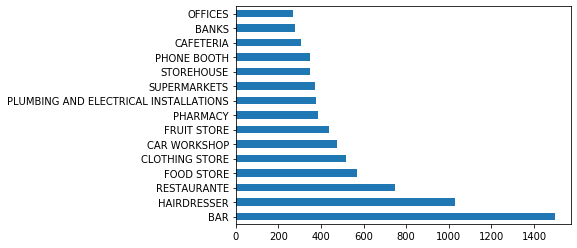

In [67]:
venues_0.head(15).plot(kind='barh')

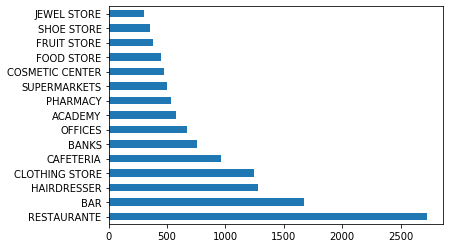

In [68]:
cluster_1 = madrid_merged[madrid_merged['Cluster Labels'] == 1]

venues_1 = cluster_1['desc_epigrafe'].value_counts()

venues_1.head(15).plot(kind='barh')

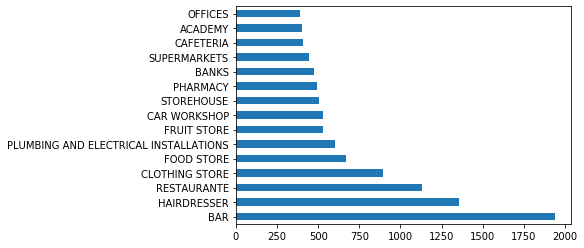

In [69]:
cluster_2 = madrid_merged[madrid_merged['Cluster Labels'] == 2]

venues_2 = cluster_2['desc_epigrafe'].value_counts()

venues_2.head(15).plot(kind='barh')

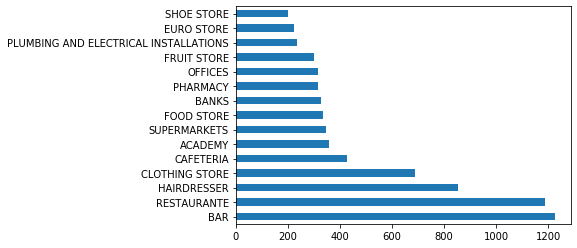

In [70]:
cluster_3 = madrid_merged[madrid_merged['Cluster Labels'] == 3]

venues_3 = cluster_3['desc_epigrafe'].value_counts()

venues_3.head(15).plot(kind='barh')

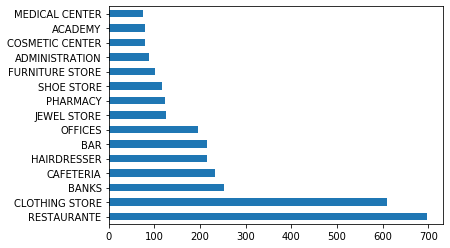

In [71]:
cluster_4 = madrid_merged[madrid_merged['Cluster Labels'] == 4]

venues_4 = cluster_4['desc_epigrafe'].value_counts()

venues_4.head(15).plot(kind='barh')

Now we are going to represent the clusters and the other data in choropleth maps. To do that we need a Geojson file with the geographical data of Madrid's neighborhoods. Sadly the file doesn't include the newest neighborhoods: Ensanche de Vallecas, Valdebernardo, Valderribas and El Cañaveral.

To bind **barrios** and the **geojson file** successfully, the name of the neighborhood in **barrios** must match exactly the name of the neighborhood in the **geojson file**. Therefore, we have to analyze which names are contained in the **geojson** file and modify the names in **barrios** accordingly.

In [72]:
import json
madrid_geo = r'madrid.geojson'
with open(madrid_geo) as madrid_file:
    madrid_json = json.load(madrid_file)

denominations_json = []
for index in range(len(madrid_json['features'])):
    denominations_json.append(madrid_json['features'][index]['properties']['name'])
    

As shown above, the json.load() method returns a Python dictionary. Then, we loop through the dictionary to obtain the names of the neighborhoods. We have created a list with **geojson file** names in the same order as they appear in **barrios** data frame.

In [73]:
Geojson_names = [ 'Abrantes', 'Acacias', 'Adelfas', 'Aeropuerto', 'Alameda de Osuna', 'Almagro', 'Almenara', 'Almendrales', 
                 'Aluche', 'Amposta', 'Apostol Santiago', 'Arapiles', 'Aravaca', 'Arcos', 'ArgÃ¼elles', 'Atalaya', 'Atocha', 
                 'Bellas Vistas', 'Berruguete', 'Buenavista', 'Butarque', 'Campamento', 'Canillas', 'Canillejas', 
                 'Casa de Campo', 'Casco HistÃ³rico de Barajas', 'Casco HistÃ³rico de Vallecas', 'Casco HistÃ³rico de VicÃ¡lvaro',
                 'Castellana', 'Castilla', 'Castillejos', 'Chopera', 'Ciudad JardÃ\xadn', 'Ciudad Universitaria', 'Colina', 
                 'Comillas', 'ConcepciÃ³n', 'Corralejos', 'Cortes', 'Costillares', 'Cuatro Caminos', 'Cuatro Vientos', 
                 'Delicias', 'EL CAÑAVERAL', 'El Goloso', 'El Pardo', 'Pilar', 'El PlantÃ\xado', 'Salvador', 'El Viso', 
                 'Embajadores', 'ENSANCHE DE VALLECAS', 'EntrevÃ\xadas', 'Estrella', 'FontarrÃ³n', 'Fuente del Berro', 
                 'Fuentelareina', 'Gaztambide', 'Goya', 'Guindalera', 'HellÃ\xadn', 'HispanoamÃ©rica', 'Horcajo', 'Ibiza', 
                 'Imperial', 'Justicia', 'La Paz', 'Aguilas', 'Legazpi', 'Lista', 'Los Angeles', 'CÃ¡rmenes', 'JerÃ³nimos', 
                 'Los Rosales', 'Lucero', 'Marroquina', 'Media Legua', 'Mirasierra', 'MoscardÃ³', 'NiÃ±o JesÃºs', 'Nueva EspaÃ±a', 
                 'Numancia', 'OpaÃ±el', 'Orcasitas', 'Orcasur', 'PacÃ\xadfico','Palacio', 'Palomas', 'Palomeras Bajas', 
                 'Palomeras Sureste', 'Palos de Moguer', 'Pavones', 'PeÃ±agrande', 'Pinar del Rey', 'Piovera', 'Portazgo', 
                 'Pradolongo', 'Prosperidad', 'Pueblo Nuevo', 'Puerta Bonita', 'Puerta del Angel', 'Quintana', 'Recoletos', 'Rejas', 
                 'Rios Rosas', 'Rosas', 'San AndrÃ©s', 'San Cristobal', 'San Diego', 'San FermÃ\xadn', 'San Isidro', 
                 'San Juan Bautista', 'San Pascual', 'Santa Eugenia', 'Simancas', 'Sol', 'TimÃ³n', 'Trafalgar', 'Universidad', 
                 'Valdeacederas', 'VALDEBERNARDO', 'Valdefuentes', 'ValdemarÃ\xadn', 'VALDERRIVAS', 'Valdezarza', 'Vallehermoso', 
                 'Valverde', 'Ventas', 'Vinateros', 'Vista Alegre', 'ZofÃ\xado']
len(Geojson_names)

131

In [74]:
n = barrios['barrios'].to_list()

In [75]:
barrios.replace(dict(zip(n, Geojson_names)), inplace=True)
barrios.head()

,Cluster Labels,barrios,latitud,longitud,Edad media de la población,Población,r_media,Income_labels,Population_labels,Age_labels
0,0,Abrantes,40.380998,-3.727985,42.208792,29038.0,10450.990392,Mid-low Income,Mid-low Pop,Mid-high age
1,1,Acacias,40.404075,-3.705957,45.154373,36329.0,19020.895648,Mid Income,Mid Pop,High Age
2,1,Adelfas,40.400280,-3.671774,43.864417,17927.0,18994.695264,Mid Income,Mid-low Pop,Mid-high age
3,0,Aeropuerto,40.494167,-3.566944,40.900000,1741.0,9669.000000,Low Income,Low Pop,Mid Age
4,1,Alameda de Osuna,40.457222,-3.587778,43.340090,19334.0,19399.284617,Mid Income,Mid-low Pop,Mid-high age


In [76]:
income_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=12)
income_map.choropleth(
    geo_data=madrid_geo,
    data=barrios,
    columns=['barrios', 'r_media'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='average income in euros',
    reset=True
)

markers_colors = []
for lat, lon, poi, cluster, i, p, a in zip(barrios['latitud'], barrios['longitud'], barrios['barrios'], barrios['Cluster Labels'], 
                                 barrios['Income_labels'], barrios['Population_labels'], barrios['Age_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' / ' + str(i) + ' / ' + str(p) + ' / ' + str(a), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(income_map)
    
# display map
income_map.save('income_map.html')

In [77]:
population_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=12)
population_map.choropleth(
    geo_data=madrid_geo,
    data=barrios,
    columns=['barrios', 'Población'],
    key_on='feature.properties.name',
    fill_color='Greys', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population',
    reset=True
)

markers_colors = []
for lat, lon, poi, cluster, i, p, a in zip(barrios['latitud'], barrios['longitud'], barrios['barrios'], barrios['Cluster Labels'], 
                                 barrios['Income_labels'], barrios['Population_labels'], barrios['Age_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' / ' + str(i) + ' / ' + str(p) + ' / ' + str(a), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(population_map)
    
population_map.save('population_map.html')

In [78]:
age_map = folium.Map(location=[40.4167047, -3.7035825], zoom_start=12)
age_map.choropleth(
    geo_data=madrid_geo,
    data=barrios,
    columns=['barrios', 'Edad media de la población'],
    key_on='feature.properties.name',
    fill_color='Greys', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average age',
    reset=True
)

markers_colors = []
for lat, lon, poi, cluster, i, p, a in zip(barrios['latitud'], barrios['longitud'], barrios['barrios'], barrios['Cluster Labels'], 
                                 barrios['Income_labels'], barrios['Population_labels'], barrios['Age_labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster) + ' / ' + str(i) + ' / ' + str(p) + ' / ' + str(a), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(age_map)
    
age_map.save('age_map.html')

<h1>RESULTS AND DISCUSSION</h1>

Based on all the analysis performed in the data, these are all the observations that we have made:
- Cluster 0 (Red) groups the poorest neighborhoods, that are mostly located in the periphery. It has the lowest average age. Some of the most common venues are car workshops, plumbing and electrical installations and phone booths.
- Cluster 1 (Purple) groups neighborhoods located mostly in the center of the city. There are some neighborhoods in the periphery but none of them are in the south. The average income is high and the population is low. The average age is high. Some of their most common activities are clothing stores, banks, offices, cosmetic centers and jewel stores.
- Cluster 2 (Blue) groups neighborhoods in the peripehry. They are also the most populated neighborhoods and the 'youngest', and they have a low-medium average income. Some of their most common activities are plumbing and electrical installatiosn, car workshops, and storehouses.
- Cluster 3 (Cyan) groups neighborhoods in all parts of the city, it has a few 'young' neighborhoods but most of the population is old, with low population and average income. It has more academys and offices than plumbing and electrical installations. It also has 'euro shops'.
- Cluster 4 (Orange) groups neighborhoods in the center and north of the city. They are the richest neighborhoods and the least populated, some neighborhoods have a young population. The most common activities are banks, offices, stores, administration and medical centers.

We can see that there's a clear divide between north and south and between the center and the periphery of the city in terms of income, population and the activities performed. The richest and least populated neighborhoods (clusters 1 and 4) are in the center and north of the city and concentrate commercial, administrative and financial activities. 

Some of the neighborhoods with average income and low population (cluster 3) are in the center of the city (Sol, Universidad) but the rest are in the periphery. That explains that the activities performed are quite diverse. Sol is one of the most commercial neighborhoods and attracts a lot of tourists, but other neighborhoods have a more industrial or administrative profile. 

The poorest and most populated neighborhoods (clusters 0 and 2) are all in the periphery, specially in the south. They have and industrial profile because some of the most common activities are car workshops, plumbing and electrical installations and storehouses. Many of these neighborhoods have a high immigrant population, which explains the more than 400 phone booths in cluster 0.

I haven't mention bars, restaurants and hairdressers until now because they are all around the city, the only difference is how many there are. Restaurants are the most common activity in clusters 1 and 4, but in clusters 0 and 2 are the third most common. Bars are the most common activity in clusters 0, 2 and 3 and the second most common activity in cluster 1. Something similar happens with hairdressers, they are one of the five most common activities in all the clusters except cluster 4.

<h1>CONCLUSION</h1>

The purpose of this project was to classify Madrid's neighborhoods and help companies to identify the best parts of the city to locate their bussineses. To do that we have combined venues data with income and population data for each neighborhood to cluster them. Thanks to this analysis we have identified the parts of the city with a financial and commercial profile, and the ones with a more industrial profile. Logically, the financial neighborhoods are also the richest, but also the least populated. We have also identified the 'youngest' neighborhoods and we have clasiffied most of them as medium-high average income, what gives them a potential for growth.

Unfortunately, most of the data is from 2016 and Madrid has been badly affected by the Covid-19 pandemic. If we could perform the same analysis with updated data we are sure that the results would be quite different.